---

> $Rishita$ $Shah$ $2347143$<br/>
 $LAB - 6:$ $NNDL$ <br/>

---



In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/NNDL/HistoricalQuotes.csv')

In [5]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23


In [6]:
# Selecting the 'Close' column as the target variable for prediction
close_prices = data[' Close/Last'].values

In [7]:
data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [8]:
# Remove any non-numeric characters (like "$" and ",") and convert columns to float
for column in [' Open', ' High', ' Low', ' Close/Last', ' Volume']:
    data[column] = data[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Verify the changes
print(data.head())

         Date   Close/Last       Volume    Open    High     Low
0  02/28/2020       273.36  106721200.0  257.26  278.41  256.37
1  02/27/2020       273.52   80151380.0  281.10  286.00  272.96
2  02/26/2020       292.65   49678430.0  286.53  297.88  286.50
3  02/25/2020       288.08   57668360.0  300.95  302.53  286.13
4  02/24/2020       298.18   55548830.0  297.26  304.18  289.23


In [9]:
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Confirm the updated column names
print("Updated column names:", data.columns)

Updated column names: Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [10]:
# Normalize the 'Close/Last' column to the range [0, 1]
scaler = MinMaxScaler()
close_prices_normalized = scaler.fit_transform(data[['Close/Last']])

# Add the normalized 'Close/Last' data back to the DataFrame
data['Close/Last_Normalized'] = close_prices_normalized

# Print first few normalized values to verify
print(data[['Close/Last', 'Close/Last_Normalized']].head())

   Close/Last  Close/Last_Normalized
0      273.36               0.818943
1      273.52               0.819481
2      292.65               0.883813
3      288.08               0.868444
4      298.18               0.902409


In [11]:
# Define a helper function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 60

# Assuming 'data' contains your entire dataset
# Split the data into training and testing sets
# Adjust 0.8 to change the split ratio as needed
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Extract the 'Close/Last_Normalized' column for creating sequences
train_data_normalized = train_data[['Close/Last_Normalized']].values # Extract values as a NumPy array
test_data_normalized = test_data[['Close/Last_Normalized']].values # Extract values as a NumPy array

# Now you can create the sequences
X_train, y_train = create_sequences(train_data_normalized, sequence_length)
X_test, y_test = create_sequences(test_data_normalized, sequence_length)

In [12]:
# Reshape data for RNN input (samples, sequence_length, 1 feature)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Dense layer with 1 unit for regression output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0554 - val_loss: 1.0603e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4476e-04 - val_loss: 8.2707e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2874e-04 - val_loss: 3.1189e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0964e-04 - val_loss: 1.8201e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0256e-04 - val_loss: 2.0540e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0275e-04 - val_loss: 1.5991e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.8790e-05 - val_loss: 2.3435e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7925e-04 - val_loss: 2.8865e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2375e-04 - val_loss: 3.6551e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1381e-04 - val_loss: 1.5384e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2082e-05 - 

In [15]:
# Predict the stock prices on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and actual prices to the original scale
predicted_prices_original = scaler.inverse_transform(predicted_prices)
actual_prices_original = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


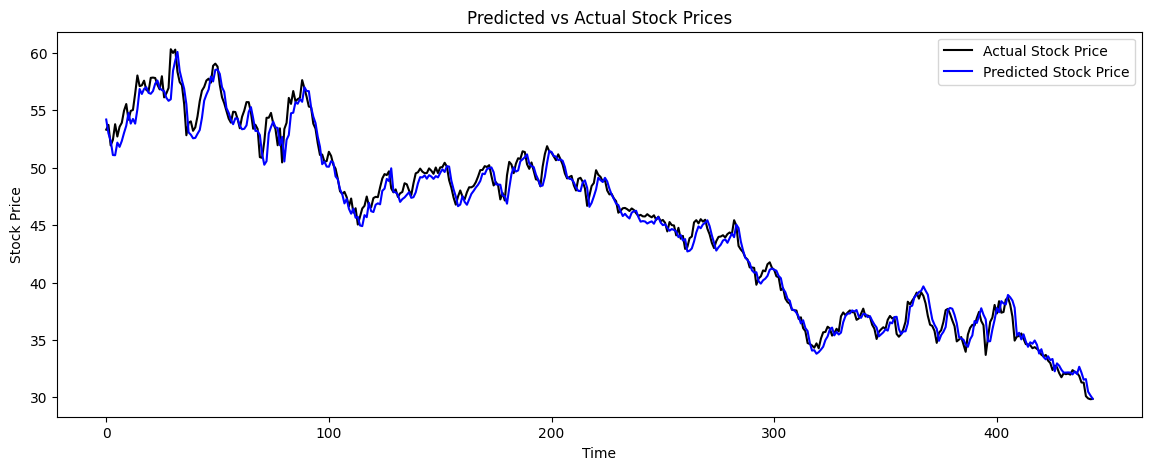

In [16]:
import matplotlib.pyplot as plt

# Plot predicted vs actual stock prices
plt.figure(figsize=(14, 5))
plt.plot(actual_prices_original, color='black', label='Actual Stock Price')
plt.plot(predicted_prices_original, color='blue', label='Predicted Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(actual_prices_original, predicted_prices_original)
rmse = np.sqrt(mean_squared_error(actual_prices_original, predicted_prices_original))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.7052307835209478
Root Mean Squared Error (RMSE): 0.9452939358550045


In [18]:
# Calculate directional accuracy
def directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual.flatten()))
    predicted_direction = np.sign(np.diff(predicted.flatten()))

    # Calculate the percentage of times the direction is correctly predicted
    correct_directions = np.sum(actual_direction == predicted_direction)
    accuracy = correct_directions / len(actual_direction) * 100
    return accuracy

# Calculate and print directional accuracy
directional_acc = directional_accuracy(actual_prices_original, predicted_prices_original)
print(f"Directional Accuracy: {directional_acc:.2f}%")


Directional Accuracy: 57.79%


###Brief Report on RNN Model's Stock Price Predictions


The RNN model's predictions for Apple's stock prices from 2005 to 2017 are evaluated using the provided metrics: `Mean Absolute Error (MAE)` of `0.705`, `Root Mean Squared Error (RMSE)` of` 0.945`, and a `Directional Accuracy` of `57.79%`. The plot above compares the predicted stock prices (blue line) with actual prices (black line), illustrating that the model generally follows the trends of the stock movements.

### Discussion of Results
The model captures the overall trend in Apple's stock prices, indicating that it `effectively learns historical patterns`. Minor discrepancies between predicted and actual prices appear, particularly during periods of rapid price change, which reflects `limitations in capturing short-term volatility`.

The low MAE suggests a `relatively small average error` between predictions and actual values, while the RMSE highlights a `limited extent of larger errors`. The directional accuracy of 57.79% shows that the `model slightly outperforms random guessing` in predicting price movement directions, which is useful for trading strategies.

### Observed Limitations and Areas for Improvement
1. **Handling Sudden Market Changes**: The model's difficulty in predicting abrupt changes suggests limitations in adaptability to unforeseen market events.
2. **Overfitting Concerns**: The model may overfit the training data, as indicated by high accuracy on training but some deviation during testing. Applying regularization techniques or simplifying the architecture may help.
3. **Feature Selection**: The model only uses the 'Close' price. Incorporating additional features such as trading volume or external economic indicators could improve predictions.


In conclusion, while the model demonstrates strong alignment between predicted and actual stock prices, further enhancements, such as feature expansion and model refinement, could boost its predictive accuracy and robustness.